In [111]:
import numpy as np
from matplotlib import pyplot as plt

## Task 2
### b)

In [112]:
# Load the data

data = np.load('data1d.npy')
labels = np.load('labels1d.npy')

# Sort the data and labels based on the data values
idx = np.argsort(data)
data = data[idx]
labels = labels[idx]

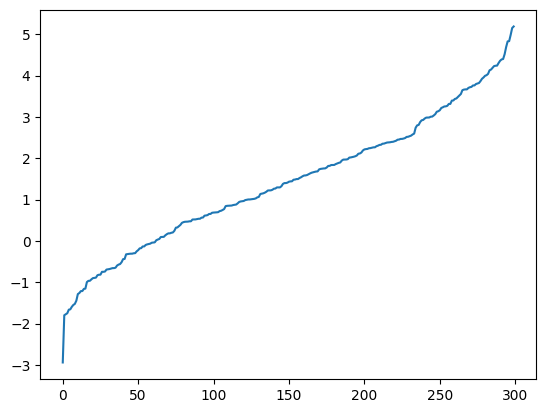

In [113]:
# rough plot of the data

x = np.arange(data.shape[0])
plt.plot(x, data, label='Data')

plt.show()

In [114]:
# Number of class-1 labels up to position i
cum_pos = np.cumsum(labels)               # count of 1's
cum_neg = np.cumsum(1 - labels)           # count of 0's
total_pos = cum_pos[-1]
total_neg = cum_neg[-1]

In [115]:
# Arrays for i = 1..N-1 (left node has i samples)

N = data.shape[0]
gini = np.zeros(N-1)
entropy = np.zeros(N-1)
misclass = np.zeros(N-1)

In [116]:
# Formulas

def node_gini(pos, n):
    if n == 0:
        return 0.0
    p = pos / n
    return 1.0 - p*p - (1-p)*(1-p)

def node_entropy(pos, n):
    if n == 0:
        return 0.0
    p = pos / n
    if p <= 0.0 or p >= 1.0:
        return 0.0
    return - (p*np.log2(p) + (1-p)*np.log2(1-p))

def node_mis(pos, n):
    if n == 0:
        return 0.0
    p = pos / n
    return 1.0 - max(p, 1-p)

In [117]:
# Loop through all possible splits and write to arrays

for i in range(1, N):
    nL = i
    posL = int(cum_pos[i-1])
    nR = N - nL
    posR = int(total_pos - posL)

    gL = node_gini(posL, nL)
    gR = node_gini(posR, nR)
    gini[i-1] = (nL*gL + nR*gR) / N

    eL = node_entropy(posL, nL)
    eR = node_entropy(posR, nR)
    entropy[i-1] = (nL*eL + nR*eR) / N

    mL = node_mis(posL, nL)
    mR = node_mis(posR, nR)
    misclass[i-1] = (nL*mL + nR*mR) / N

In [118]:
# find best splits (i values)

best_g = np.argmin(gini) + 1
best_e = np.argmin(entropy) + 1
best_m = np.argmin(misclass) + 1 

def split_threshold(i):
    # midpoint between data[i-1] and data[i] (i in 1..N-1)
    return 0.5*(data[i-1] + data[i])

th_g = split_threshold(best_g)
th_e = split_threshold(best_e)
th_m = split_threshold(best_m)

print(f'Best Gini split at i={best_g}, threshold={th_g:.4f}, gini={gini[best_g-1]:.6f}')
print(f'Best Entropy split at i={best_e}, threshold={th_e:.4f}, entropy={entropy[best_e-1]:.6f}')
print(f'Best Misclass split at i={best_m}, threshold={th_m:.4f}, misclass={misclass[best_m-1]:.6f}')

Best Gini split at i=170, threshold=1.7080, gini=0.297225
Best Entropy split at i=177, threshold=1.8162, entropy=0.611926
Best Misclass split at i=95, threshold=0.6149, misclass=0.196667


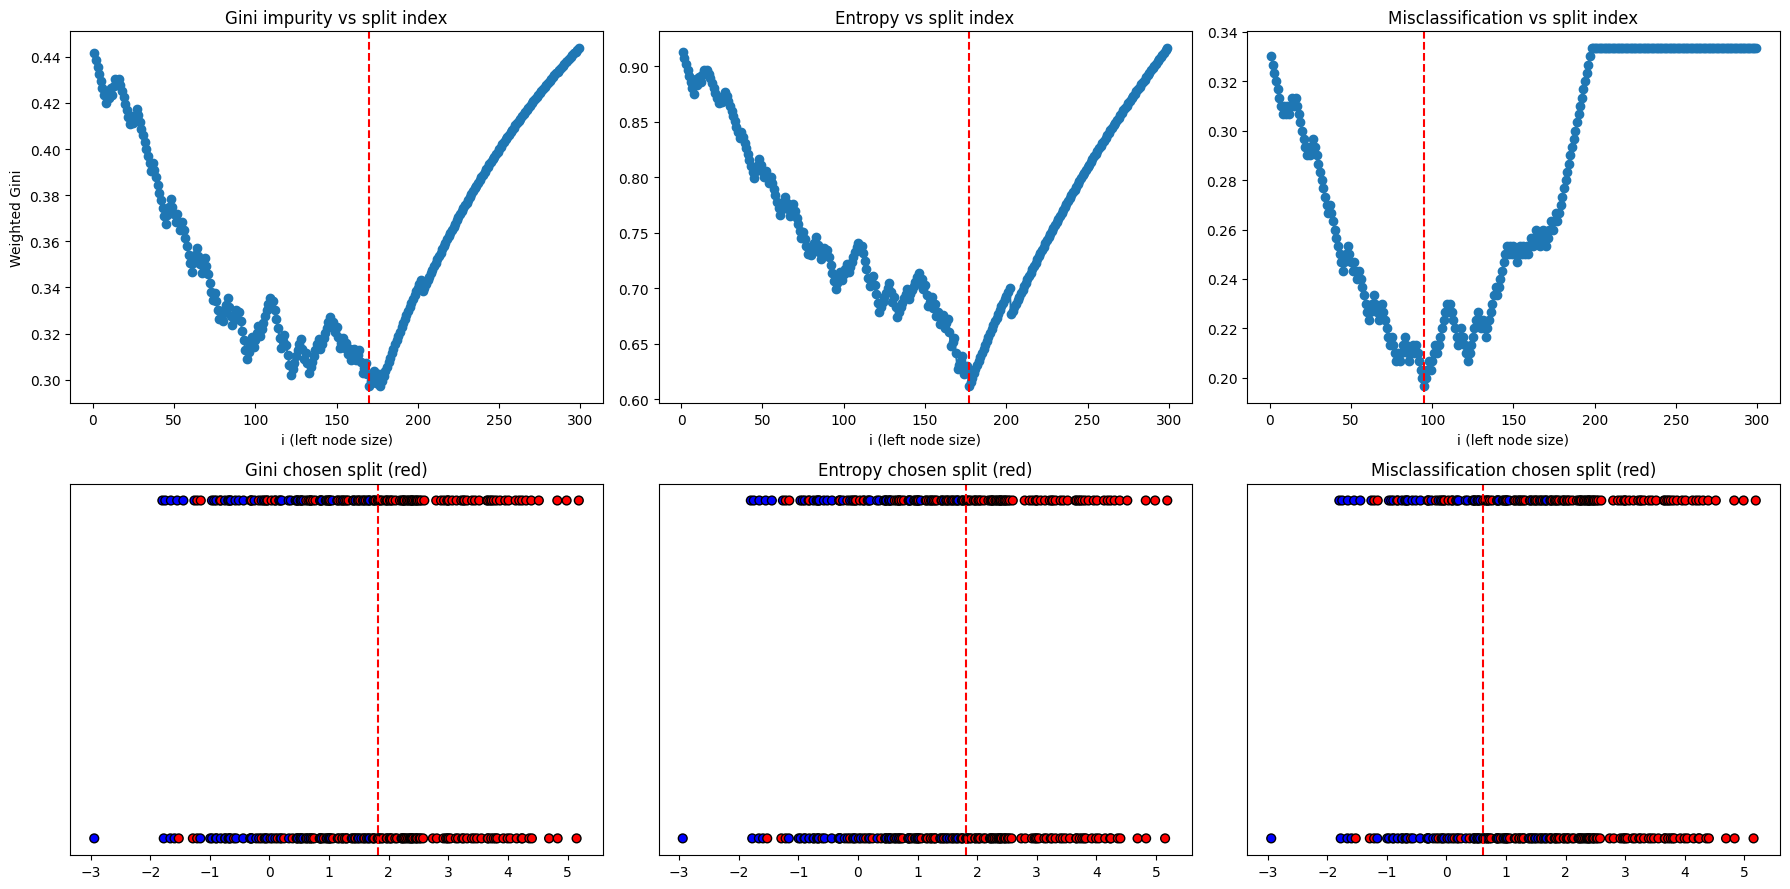

In [119]:
# Visualization: top row -> impurity curves; bottom row -> data scatter + chosen split lines

fig, axs = plt.subplots(2, 3, figsize=(18, 9))
x = np.arange(1, N)

# Gini plot
axs[0,0].plot(x, gini, '-o')
axs[0,0].axvline(best_g, color='r', linestyle='--')
axs[0,0].set_title('Gini impurity vs split index')
axs[0,0].set_xlabel('i (left node size)')
axs[0,0].set_ylabel('Weighted Gini')

# Entropy plot
axs[0,1].plot(x, entropy, '-o')
axs[0,1].axvline(best_e, color='r', linestyle='--')
axs[0,1].set_title('Entropy vs split index')
axs[0,1].set_xlabel('i (left node size)')

# Misclassification plot
axs[0,2].plot(x, misclass, '-o')
axs[0,2].axvline(best_m, color='r', linestyle='--')
axs[0,2].set_title('Misclassification vs split index')
axs[0,2].set_xlabel('i (left node size)')

# scatter plots of data with split thresholds (use small jitter for y)
jitter = (np.arange(N) % 2) * 0.02 - 0.01  # simple deterministic jitter
axs[1,0].scatter(data, np.zeros_like(data) + jitter, c=labels, cmap='bwr', s=40, edgecolors='k')
axs[1,0].axvline(th_e, color='r', linestyle='--')
axs[1,0].set_title('Gini chosen split (red)')
axs[1,0].set_yticks([])

axs[1,1].scatter(data, np.zeros_like(data) + jitter, c=labels, cmap='bwr', s=40, edgecolors='k')
axs[1,1].axvline(th_e, color='r', linestyle='--')
axs[1,1].set_title('Entropy chosen split (red)')
axs[1,1].set_yticks([])

axs[1,2].scatter(data, np.zeros_like(data) + jitter, c=labels, cmap='bwr', s=40, edgecolors='k')
axs[1,2].axvline(th_m, color='r', linestyle='--')
axs[1,2].set_title('Misclassification chosen split (red)')
axs[1,2].set_yticks([])

plt.tight_layout()
plt.show()